# Library Selection

How important it is to have the right data first. Example on van der Pol oscillator $x''+\mu(x^2-1)x'+x=0$ which can be written as the system
$$
\begin{cases}
x'=y\\
y' = -\mu(x^2-1)y-x
\end{cases}
$$


In [1]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scienceplots
plt.style.use(["science", "notebook", "grid"])

In [2]:
# generate data
def van_der_pol(t, x, mu=3):
    return [x[1], -mu * (x[0]**2 - 1) * x[1] - x[0]]

delta_t = 0.01
t = np.arange(0, 20, delta_t)
x0 = [2,2]
x_train = solve_ivp(van_der_pol, (t[0], t[-1]), x0, t_eval=t).y.T
x_data = x_train[:, 0]
y_data = x_train[:, 1]

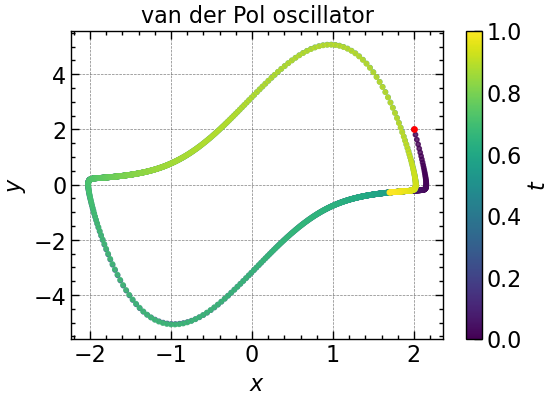

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, c=t, cmap='viridis', alpha=0.8, s = 10)
plt.scatter(x0[0], x0[1], c = "r", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.colorbar(label = "$t$")
plt.title("van der Pol oscillator")
plt.show()

## PolyLibrary

In [4]:
opt = ps.STLSQ(threshold=0.1)
lib = ps.PolynomialLibrary(degree=5) #poly library
diff_method = ps.FiniteDifference()
derivative = np.array([van_der_pol(0, x_train[t]) for t in range(t.size)])
feat = ["x", "y"]
model = ps.SINDy(optimizer=opt, feature_library=lib, differentiation_method=diff_method, feature_names=feat)
model.fit(x_train, delta_t, derivative)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5), feature_names=['x', 'y'],
      optimizer=STLSQ())

In [5]:
model.print()

(x)' = 1.000 y
(y)' = -1.000 x + 3.000 y + -3.000 x^2 y


Right model identified

In [6]:
model_sim = model.simulate(x0, t)
model_sim_x = model_sim[:, 0]
model_sim_y = model_sim[:, 1]

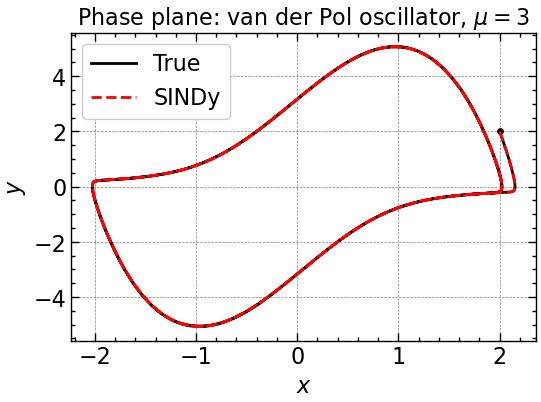

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(x_data, y_data, c = "k", label = "True")
plt.plot(model_sim_x, model_sim_y, "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title("Phase plane: van der Pol oscillator, $\mu=3$")
plt.show()

## Fourier Library

In [8]:
lib_fourier = ps.FourierLibrary(3) # sinusoidal library
model_fourier = ps.SINDy(optimizer=opt, feature_library=lib_fourier, differentiation_method=diff_method, feature_names=feat)
model_fourier.fit(x_train, delta_t, derivative)
model_fourier.print()

(x)' = 0.532 sin(1 x) + -0.240 sin(1 y) + 0.431 sin(2 x) + 0.884 sin(2 y) + -1.052 sin(3 x) + 1.197 sin(3 y)
(y)' = -7.301 sin(1 x) + -7.600 sin(1 y) + -4.403 sin(2 x) + -3.370 sin(2 y) + 0.690 sin(3 x) + -0.131 cos(3 x) + -2.297 sin(3 y)


Wrong model

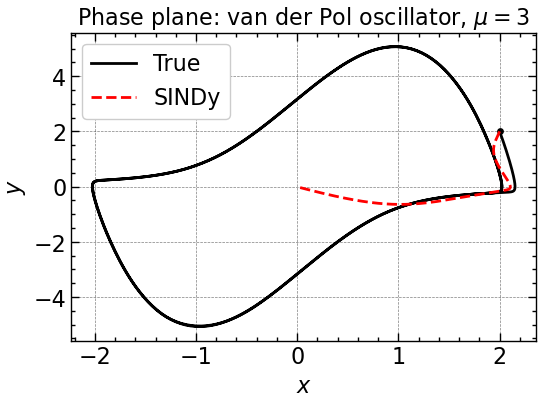

In [9]:
model_sim_fourier = model_fourier.simulate(x0, t)
model_sim_x_fourier = model_sim_fourier[:, 0]
model_sim_y_fourier = model_sim_fourier[:, 1]
plt.figure(figsize=(6, 4))
plt.plot(x_data, y_data, c = "k", label = "True")
plt.plot(model_sim_x_fourier, model_sim_y_fourier, "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.title("Phase plane: van der Pol oscillator, $\mu=3$")
plt.show()

## Combine plots

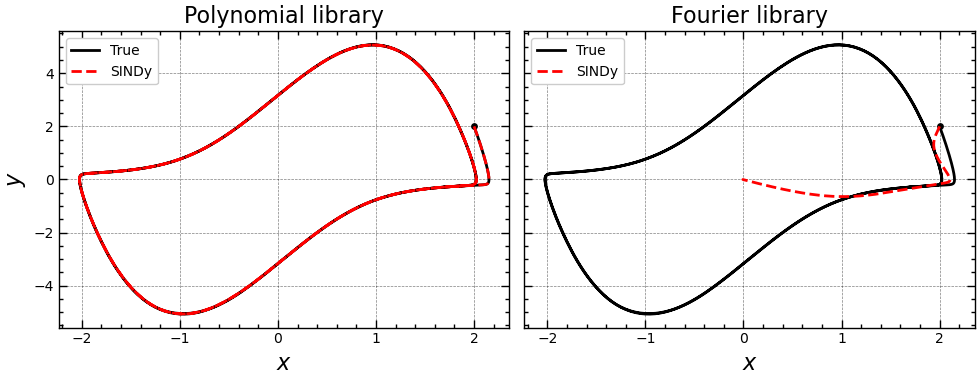

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot 1
ax1.plot(x_data, y_data, c="k", label="True")
ax1.plot(model_sim_x, model_sim_y, "r--", label="SINDy")
ax1.scatter(x0[0], x0[1], c="k", s=15)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)
ax1.legend(prop={'size': 10})
ax1.set_title("Polynomial library")

# Plot 2
ax2.plot(x_data, y_data, c="k", label="True")
ax2.plot(model_sim_x_fourier, model_sim_y_fourier, "r--", label="SINDy")
ax2.scatter(x0[0], x0[1], c="k", s=15)
ax2.set_xlabel("$x$")
ax2.xaxis.set_tick_params(labelsize=10)

ax2.legend(prop={'size': 10})
ax2.set_title("Fourier library")
plt.tight_layout()
plt.show()

# Circle vs Limit Cycle

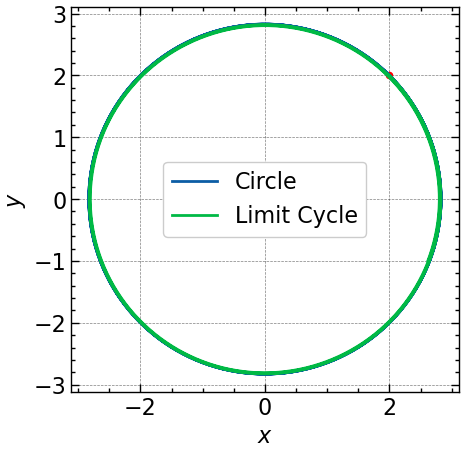

In [11]:
def circle(t, x):
    return [x[1], -x[0]]

def van_der_pol_small(t, x, mu = 0.001):
    return [x[1], -mu * (x[0]**2 - 1) * x[1] - x[0]]

# x0 = (2,2)
circle_data = solve_ivp(circle, (t[0], t[-1]), x0, t_eval=t).y.T
van_der_pol_small_data = solve_ivp(van_der_pol_small, (t[0], t[-1]), x0, t_eval=t).y.T

plt.figure(figsize=(5, 5))
plt.plot(circle_data[:, 0], circle_data[:, 1], label = "Circle")
plt.plot(van_der_pol_small_data[:, 0], van_der_pol_small_data[:, 1], label = "Limit Cycle")
plt.scatter(x0[0], x0[1], c = "r", s = 20)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [12]:
model_circle = ps.SINDy(optimizer=opt, feature_library=lib, differentiation_method=diff_method, feature_names=feat)
model_circle.fit(circle_data, t, np.array([circle(0, circle_data[t]) for t in range(t.size)]))
model_circle.print()

(x)' = 0.151 y^3
(y)' = -0.149 x^3


In [13]:
circle_sim = model_circle.simulate(x0, t)

In [14]:
model_vdp = ps.SINDy(optimizer=opt, feature_library=lib, differentiation_method=diff_method, feature_names=feat)
model_vdp.fit(van_der_pol_small_data, t, np.array([van_der_pol_small(0, van_der_pol_small_data[t]) for t in range(t.size)]))
model_vdp.print()

(x)' = 1.000 y
(y)' = -1.000 x


In [15]:
vdp_sim = model_vdp.simulate(x0, t)

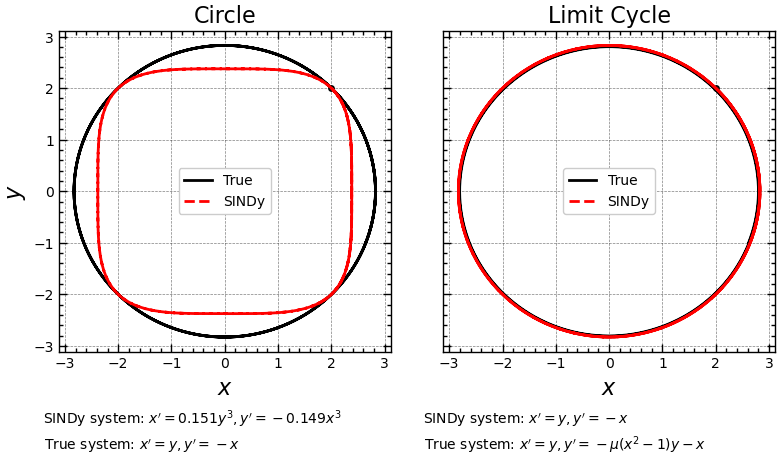

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

# Plot 1
ax1.plot(circle_data[:, 0], circle_data[:, 1], c="k", label="True")
ax1.plot(circle_sim[:, 0], circle_sim[:, 1], "r--", label="SINDy")
ax1.scatter(x0[0], x0[1], c="k", s=15)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)
ax1.legend(prop={'size': 10})
ax1.set_title("Circle")

# Plot 2
ax2.plot(van_der_pol_small_data[:, 0], van_der_pol_small_data[:, 1], c="k", label="True")
ax2.plot(vdp_sim[:, 0], vdp_sim[:, 1], "r--", label="SINDy")
ax2.scatter(x0[0], x0[1], c="k", s=15)
ax2.set_xlabel("$x$")
ax2.xaxis.set_tick_params(labelsize=10)
ax2.legend(prop={'size': 10})
ax2.set_title("Limit Cycle")

sindy_text_circle = "SINDy system: $x'=0.151 y^3, y'=-0.149 x^3$"
model_text_circle = "True system: $x'=y, y'=-x$"
ax1.text(-0.6, -4.5, sindy_text_circle, ha='center')
ax1.text(-1.55, -5, model_text_circle, ha='center')

sindy_text_vdp = "SINDy system: $x'=y, y'=-x$"
model_text_vdp = "True system: $x'=y, y'=-\mu(x^2-1)y-x$"
ax2.text(-1.55, -4.5, sindy_text_vdp, ha='center')
ax2.text(-.83, -5, model_text_vdp, ha='center')

plt.tight_layout()
plt.show()

# Candidate Terms

Identify the follwoing system $\begin{cases}x'=\sin(2y)\\y'=1-\cos(x)\end{cases}$

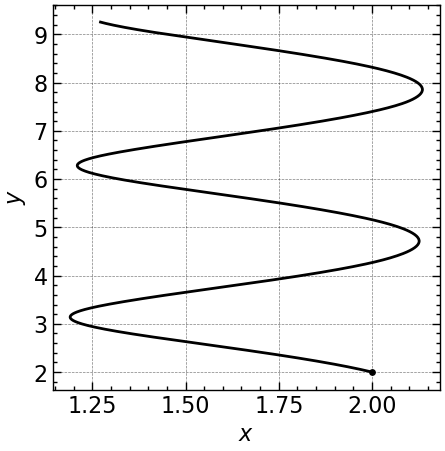

In [17]:
def f(t, x):
    return [np.sin(2 * x[1]), 1 - np.cos(x[0])]

t = np.arange(0, 7, delta_t)
ode_data = solve_ivp(f, (t[0], t[-1]), x0, t_eval=t).y.T
ode_derivative = np.array([f(0, ode_data[t]) for t in range(t.size)])
plt.figure(figsize=(5, 5))
plt.plot(ode_data[:, 0], ode_data[:, 1], c = "k")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [18]:
# poly library constant + linear
opt_const = ps.STLSQ(threshold=0.1, fit_intercept=True)
model1 = ps.SINDy(optimizer=opt_const, feature_library=ps.PolynomialLibrary(1), differentiation_method=diff_method, feature_names=feat)
model1.fit(ode_data, t, ode_derivative)
model1.print()

(x)' = -0.107
(y)' = 0.971 x + -0.526


c:\Users\sandr\anaconda3\envs\sindy\Lib\site-packages\pysindy\optimizers\stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


In [19]:
model1_sim = model1.simulate(x0, t)

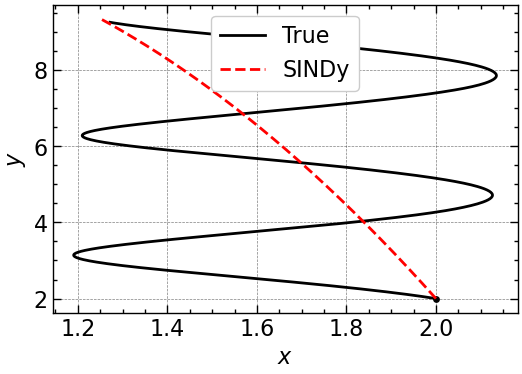

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(ode_data[:, 0], ode_data[:, 1], c = "k", label = "True")
plt.plot(model1_sim[:, 0], model1_sim[:, 1], "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Wrong. Let's add higher order terms.

In [21]:
# poly order 3
model2 = ps.SINDy(optimizer=opt_const, feature_library=ps.PolynomialLibrary(3), differentiation_method=diff_method, feature_names=feat)
model2.fit(ode_data, t, ode_derivative)
model2.print()

(x)' = -0.107
(y)' = 0.971 x + -0.526


c:\Users\sandr\anaconda3\envs\sindy\Lib\site-packages\pysindy\optimizers\stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


In [22]:
model2_sim = model2.simulate(x0, t)

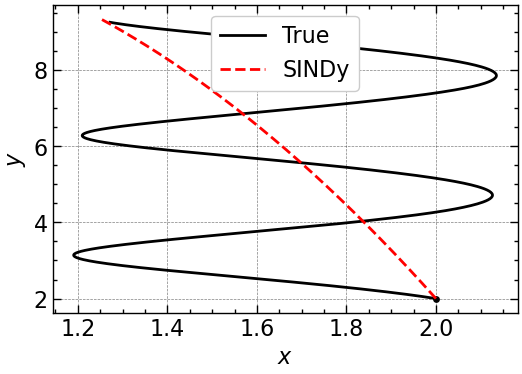

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(ode_data[:, 0], ode_data[:, 1], c = "k", label = "True")
plt.plot(model2_sim[:, 0], model2_sim[:, 1], "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Model is wrong. Let's try sinusoidal functions like $\sin$ and $\cos$.

In [24]:
model3 = ps.SINDy(optimizer=opt_const, feature_library=ps.FourierLibrary(1), differentiation_method=diff_method, feature_names=feat)
model3.fit(ode_data, t, ode_derivative)
model3.print()

(x)' = -1.832 sin(1 x) + 0.185 cos(1 x) + -0.127 sin(1 y) + 0.104 cos(1 y) + 1.574
(y)' = -1.000 cos(1 x) + 1.000


In [25]:
model3_sim = model3.simulate(x0, t)

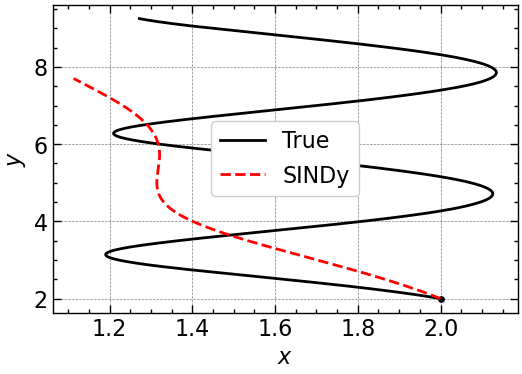

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(ode_data[:, 0], ode_data[:, 1], c = "k", label = "True")
plt.plot(model3_sim[:, 0], model3_sim[:, 1], "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Wrong, but closer. Let's increase the frequencies.

In [27]:
# frequency order 2
model4 = ps.SINDy(optimizer=opt_const, feature_library=ps.FourierLibrary(2), differentiation_method=diff_method, feature_names=feat)
model4.fit(ode_data, t, ode_derivative)
model4.print()

(x)' = 1.000 sin(2 y)
(y)' = -1.000 cos(1 x) + 1.002


In [28]:
model4_sim = model4.simulate(x0, t)

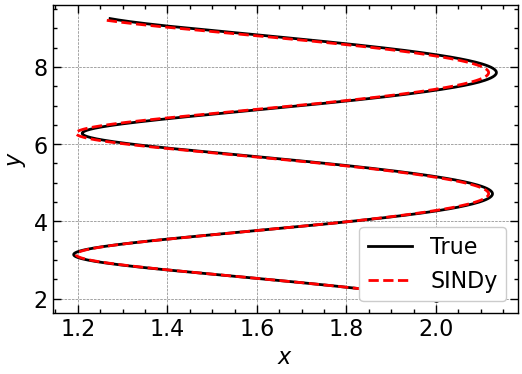

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(ode_data[:, 0], ode_data[:, 1], c = "k", label = "True")
plt.plot(model4_sim[:, 0], model4_sim[:, 1], "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Correct. What if we add too many terms?

In [30]:
big_library = ps.ConcatLibrary([ps.PolynomialLibrary(10), ps.FourierLibrary(10)])
model5 = ps.SINDy(optimizer=ps.STLSQ(threshold=0.1, fit_intercept=True), feature_library=big_library, differentiation_method=diff_method, feature_names=feat)
model5.fit(ode_data, t, ode_derivative)
model5.print()

(x)' = -0.107
(y)' = 1.037


c:\Users\sandr\anaconda3\envs\sindy\Lib\site-packages\pysindy\optimizers\stlsq.py:191: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


In [31]:
model5_sim = model5.simulate(x0, t)

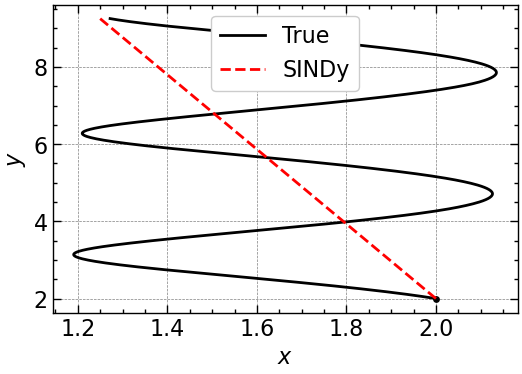

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(ode_data[:, 0], ode_data[:, 1], c = "k", label = "True")
plt.plot(model5_sim[:, 0], model5_sim[:, 1], "r--", label = "SINDy")
plt.scatter(x0[0], x0[1], c = "k", s = 15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Too many terms make it harder to find the right model. Moreover higher order polynomials are linearly dependent with sin/cos functions, as they can be approximate with a Taylor expansion.

## Combine Plots

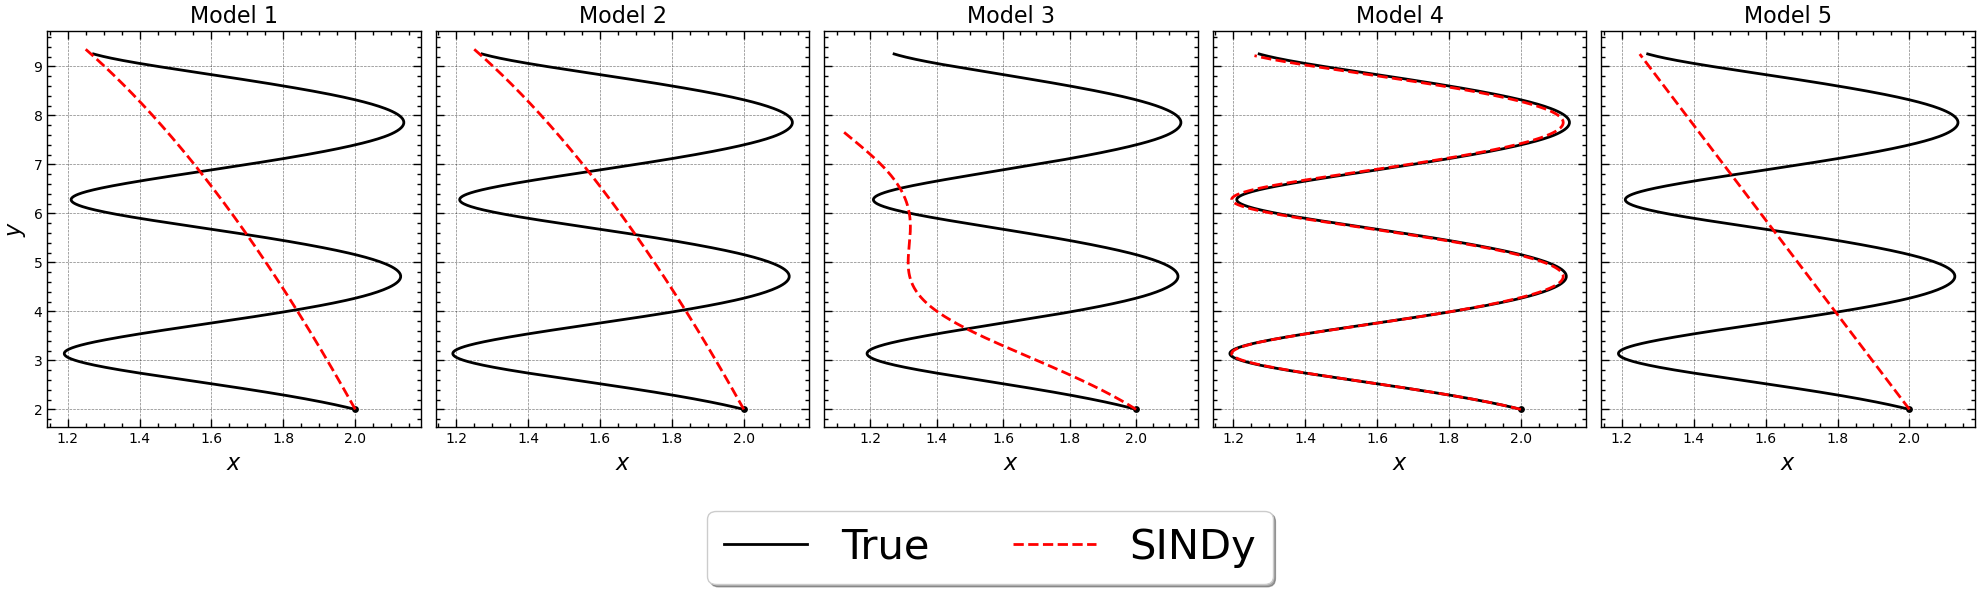

In [33]:
models_sim = [model1_sim, model2_sim, model3_sim, model4_sim, model5_sim]

fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axs[0].set_ylabel("$y$")
for i in range(5):
    ax = axs[i]
    ax.plot(ode_data[:, 0], ode_data[:, 1], c="k", label="True")
    ax.plot(models_sim[i][:, 0], models_sim[i][:, 1], "r--", label="SINDy")
    ax.scatter(x0[0], x0[1], c="k", s=15)
    ax.set_xlabel("$x$")
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    ax.set_title(f"Model {i+1}")
    # ax.legend()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), shadow=True, ncol=2, prop={'size': 30})

plt.tight_layout()
plt.show()    